In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

### Load and combine two TL trainings

In [18]:
data_1_path = "2022-03-18_08-59-40_grads_BP"
data_2_path = "2022-03-24_10-06-14_grads_BP_300"

data_file_1 = f"../trainings/Gradients_exp/{data_1_path}.npz"
data_1 = np.load(data_file_1)

print("FIRST FILE:", data_1_path)
print("Gradients shape", data_1["grads"].shape)
print("Layers", data_1["n_layers"])
print("Qubits", data_1["n_qubits"])
print("Seeds", data_1["seeds"])


data_file_2 = f"../trainings/Gradients_exp/{data_2_path}.npz"
data_2 = np.load(data_file_2)

print("\nSECOND FILE:", data_2_path)
print("Gradients shape", data_2["grads"].shape)
print("Layers", data_2["n_layers"])
print("Qubits", data_2["n_qubits"])
print("Seeds", data_2["seeds"])


# axis 0: layers, axis 1: qubits, axis 2: seeds

combined_file = {}
combined_file["n_qubits"] = data_1["n_qubits"]
combined_file["seeds"] = data_1["seeds"]
combined_file["n_layers"] = np.concatenate((data_1["n_layers"], data_2["n_layers"]))

gradients_combined = np.concatenate((data_1["grads"], data_2["grads"]), axis=0)

combined_file["grads"] = gradients_combined

print("\nCOMBINED FILE:")
print("Gradients shape", combined_file["grads"].shape)
print("Layers", combined_file["n_layers"])
print("Qubits", combined_file["n_qubits"])
print("Seeds", combined_file["seeds"])


FIRST FILE: 2022-03-18_08-59-40_grads_BP
Gradients shape (5, 5, 100)
Layers [  5  25  50  75 100]
Qubits [ 4  6  8 10 12]
Seeds [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]

SECOND FILE: 2022-03-24_10-06-14_grads_BP_300
Gradients shape (4, 5, 100)
Layers [150 200 250 300]
Qubits [ 4  6  8 10 12]
Seeds [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]

COMBINED FILE:
Gradients shape (9, 5, 100)
Layers [  5  25  50  75 100 150 200 250 300]
Qubits [ 4  6  8 10 12]
Seeds [ 0  1  2  

In [19]:
file_name= "TL_5-300_4-12"
save_path= f"../trainings/Gradients_exp/{file_name}.npz"

np.savez(save_path, grads=combined_file["grads"],
                    n_layers=combined_file["n_layers"],
                    n_qubits=combined_file["n_qubits"],
                    seeds=combined_file["seeds"])

### Load one TL training

In [20]:
data = "TL_5-300_4-12"
data_file = f"../trainings/Gradients_exp/{data}.npz"
data = np.load(data_file)
gradients, n_layers, n_qubits, seeds = data["grads"], data["n_layers"], data["n_qubits"], data["seeds"]

print("Gradients shape", data["grads"].shape)
print("Layers", data["n_layers"])
print("Qubits", data["n_qubits"])
print("Seeds", data["seeds"])

gradients = np.var(gradients, axis=2)
print(gradients.shape)

Gradients shape (9, 5, 100)
Layers [  5  25  50  75 100 150 200 250 300]
Qubits [ 4  6  8 10 12]
Seeds [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
(9, 5)


### Load one CL Training

In [21]:
data_cl = "2022-03-21_08-27-58_grads_BP_cl"
data_file_cl = f"../trainings/Gradients_exp/{data_cl}.npz"
data_cl = np.load(data_file_cl)
gradients_cl, n_layers_cl = data_cl["grads"], data_cl["n_layers"]
n_qubits_cl, seeds_cl = data_cl["n_qubits"], data_cl["seeds"]

print("Gradients shape", data["grads"].shape)
print("Layers", data["n_layers"])
print("Qubits", data["n_qubits"])
print("Seeds", data["seeds"])

gradients_cl = np.var(gradients_cl, axis=2)
print(gradients_cl.shape)

Gradients shape (9, 5, 100)
Layers [  5  25  50  75 100 150 200 250 300]
Qubits [ 4  6  8 10 12]
Seeds [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
(5, 5)


### Save combined training

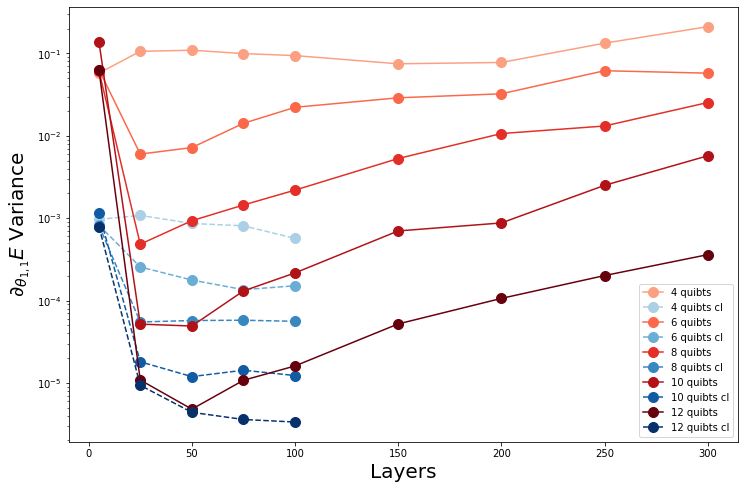

In [22]:
plt.figure(figsize=(12,8))

evenly_spaced_interval = np.linspace(0, 1, len(n_qubits)+2)
colors_triplet = [plt.cm.Reds(x) for x in evenly_spaced_interval]
colors_classic = [plt.cm.Blues(x) for x in evenly_spaced_interval]

for iq, q in enumerate(n_qubits):
    plt.plot(n_layers, gradients[:,iq], 
             label=str(q) + " quibts", marker='o', markersize=10, color=colors_triplet[iq+2])
    plt.plot(n_layers_cl, gradients_cl[:,iq], "--", 
             label=str(q) + " quibts cl", marker='o', markersize=10, color=colors_classic[iq+2])
plt.yscale("log")
plt.legend()
plt.xlabel("Layers", fontsize=20)
plt.ylabel(r"$\partial_{\theta_{1,1}} E $ Variance", fontsize=20)
plt.savefig("Gradients_combinded.png", dpi=200, bbox_inches='tight')
plt.show()